In [130]:
# importing necessary libraries

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import MySQLdb

In [2]:
# Bus routes and links

df = pd.read_csv(r'C:\IT\github\redbus_scraping_filtering\csv_files\bus_route_links.csv')
df

,Route_name,Route_link
0,Vijayawada to Hyderabad,https://www.redbus.in/bus-tickets/vijayawada-t...
1,Hyderabad to Vijayawada,https://www.redbus.in/bus-tickets/hyderabad-to...
2,Kakinada to Visakhapatnam,https://www.redbus.in/bus-tickets/kakinada-to-...
3,Visakhapatnam to Kakinada,https://www.redbus.in/bus-tickets/visakhapatna...
4,Chittoor (Andhra Pradesh) to Bangalore,https://www.redbus.in/bus-tickets/chittoor-and...
...,...,...
369,North Lakhimpur to Moran,https://www.redbus.in/bus-tickets/north-lakhim...
370,Tezpur to North Lakhimpur,https://www.redbus.in/bus-tickets/tezpur-to-no...
371,Tezpur to Tinsukia,https://www.redbus.in/bus-tickets/tezpur-to-ti...
372,Dibrugarh to Bihpuria,https://www.redbus.in/bus-tickets/dibrugarh-to...


In [3]:
# df = pd.set_option("display.max_rows", 10)
# df

In [4]:
# Retrive the bus details
driver = webdriver.Chrome()

# maximize window
driver.maximize_window()

Bus_names = []
Bus_types = []
Start_Time = []
End_Time = []
Total_Duration = []
Ratings = []
Prices = []
Seats_Available = []
Route_names = []
Route_link = []

def right_button():
    try:
        right_button = driver.find_elements(By.XPATH, "//i[@class = 'icon icon-right']")
        right_button[0].click()
        time.sleep(5)
    except:
        pass

# Loop through route links and names

for i, r in df.iterrows():
    link = r["Route_link"]
    routes = r["Route_name"]

    driver.get(link)
    time.sleep(2)  

    # Click on elements to reveal bus details
    elements = driver.find_elements(By.XPATH, f"//a[contains(@href, '{link}')]")
    for element in elements:
        element.click()
        # time.sleep(2)
    
    right_button()

    # click elements to views bus
    try:
        clicks = driver.find_element(By.XPATH, "//div[@class='button']")
        for x in clicks:
            x.click()
            time.sleep(1)
    except:
        continue  
    time.sleep(2)
    
    scrolling = True
    while scrolling:
        old_page_source = driver.page_source
        
        # Use ActionChains to perform a PAGE_DOWN
        ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
        
        time.sleep(5)  
        
        new_page_source = driver.page_source
        if new_page_source == old_page_source:
            scrolling = False

    # Extract bus details
    bus_name = driver.find_elements(By.XPATH, "//div[@class='travels lh-24 f-bold d-color']")
    bus_type = driver.find_elements(By.XPATH, "//div[@class='bus-type f-12 m-top-16 l-color evBus']")
    start_time = driver.find_elements(By.XPATH, "//*[@class='dp-time f-19 d-color f-bold']")
    end_time = driver.find_elements(By.XPATH, "//*[@class='bp-time f-19 d-color disp-Inline']")
    total_duration = driver.find_elements(By.XPATH, "//*[@class='dur l-color lh-24']")

    try:
        rating = driver.find_elements(By.XPATH,"//div[@class='clearfix row-one']/div[@class='column-six p-right-10 w-10 fl']")

    except:
        continue
    price = driver.find_elements(By.XPATH, '//*[@class="fare d-block"]')
    seats = driver.find_elements(By.XPATH, "//div[contains(@class, 'seat-left')]")

    # Append data to respective lists
    for bus in bus_name:
        Bus_names.append(bus.text)
        Route_link.append(link)
        Route_names.append(routes)

    for bus_type_elem in bus_type:
        Bus_types.append(bus_type_elem.text)

    for start_time_elem in start_time:
        Start_Time.append(start_time_elem.text)

    for end_time_elem in end_time:
        End_Time.append(end_time_elem.text)

    for total_duration_elem in total_duration:
        Total_Duration.append(total_duration_elem.text)

    for ratings in rating:
        Ratings.append(ratings.text)

    for price_elem in price:
        Prices.append(price_elem.text)

    for seats_elem in seats:
        Seats_Available.append(seats_elem.text)
        
print("Successfully Completed")

Successfully Completed


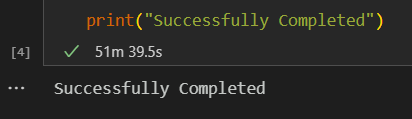

In [5]:
driver.quit()

In [20]:
# From list to convert data frame

data = {
    'Bus_name': Bus_names,
    'Bus_type': Bus_types,
    'Start_time': Start_Time,
    'End_time': End_Time,
    'Total_duration': Total_Duration,
    'Price': Prices,
    "Seats_Available":Seats_Available,
    "Ratings":Ratings,
    'Route_link': Route_link,
    'Route_names': Route_names
}

In [21]:
df = pd.DataFrame(data)
df

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_names


In [7]:
df = pd.read_csv(r'C:\IT\github\redbus_scraping_filtering\csv_files\bus_route_links.csv')
df

,Route_name,Route_link
0,Vijayawada to Hyderabad,https://www.redbus.in/bus-tickets/vijayawada-t...
1,Hyderabad to Vijayawada,https://www.redbus.in/bus-tickets/hyderabad-to...
2,Kakinada to Visakhapatnam,https://www.redbus.in/bus-tickets/kakinada-to-...
3,Visakhapatnam to Kakinada,https://www.redbus.in/bus-tickets/visakhapatna...
4,Chittoor (Andhra Pradesh) to Bangalore,https://www.redbus.in/bus-tickets/chittoor-and...
...,...,...
369,North Lakhimpur to Moran,https://www.redbus.in/bus-tickets/north-lakhim...
370,Tezpur to North Lakhimpur,https://www.redbus.in/bus-tickets/tezpur-to-no...
371,Tezpur to Tinsukia,https://www.redbus.in/bus-tickets/tezpur-to-ti...
372,Dibrugarh to Bihpuria,https://www.redbus.in/bus-tickets/dibrugarh-to...


In [8]:
# Retrive the bus details
driver = webdriver.Chrome()

# Maximize window
driver.maximize_window()

Bus_names = []
Bus_types= []
Start_Time = []
End_Time = []
Ratings = []
Total_Duration = []
Prices = []
Seats_Available = []
Route_names = []
Route_links = []

def click_right_button():
    try:
        right_button = driver.find_elements(By.XPATH, "//i[@class = 'icon icon-right']")
        right_button[0].click()
        time.sleep(5)
    except:
        pass

for i, r in df.iterrows():
    link=r["Route_link"]
    routes=r["Route_name"]

    # Loop through each link
    driver.get(link)
    time.sleep(2)

    # Click on elements to reveal bus details
    elements = driver.find_elements(By.XPATH, f"//a[contains(@href, '{link}')]")
    for element in elements:
        element.click()

    click_right_button()
    
    # click elements to views bus
    try:
        clicks = driver.find_elements(By.XPATH, "//div[@class='button']")
        for x in clicks:
            x.click()
            time.sleep(1)
    except:
        continue  
    time.sleep(2)
    
    # Initialize scrolling
    SCROLL_PAUSE_TIME = 1

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    
    # Extract bus details
    bus_name = driver.find_elements(By.XPATH, "//div[@class='travels lh-24 f-bold d-color']")
    bus_type = driver.find_elements(By.XPATH, "//div[@class='bus-type f-12 m-top-16 l-color evBus']")
    start_time = driver.find_elements(By.XPATH, "//*[@class='dp-time f-19 d-color f-bold']")
    end_time = driver.find_elements(By.XPATH, "//*[@class='bp-time f-19 d-color disp-Inline']")
    total_duration = driver.find_elements(By.XPATH, "//*[@class='dur l-color lh-24']")
    try:
        rating = driver.find_elements(By.XPATH,"//div[@class='clearfix row-one']/div[@class='column-six p-right-10 w-10 fl']")
    except:
        continue
    price = driver.find_elements(By.XPATH, '//*[@class="fare d-block"]')
    seats = driver.find_elements(By.XPATH, "//div[contains(@class, 'seat-left')]")

    # Append data to respective lists
    for bus in bus_name:
        Bus_names.append(bus.text)
        Route_links.append(link)
        Route_names.append(routes)
    for bus_type_elem in bus_type:
        Bus_types.append(bus_type_elem.text)
    for start_time_elem in start_time:
        Start_Time.append(start_time_elem.text)
    for end_time_elem in end_time:
        End_Time.append(end_time_elem.text)
    for total_duration_elem in total_duration:
        Total_Duration.append(total_duration_elem.text)
    for ratings in rating:
        Ratings.append(ratings.text)
    for price_elem in price:
        Prices.append(price_elem.text)
    for seats_elem in seats:
        Seats_Available.append(seats_elem.text)
        
print("Successfully Completed")

Successfully Completed


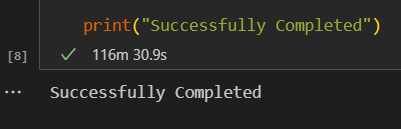

In [9]:
driver.quit()

In [10]:
# From list to convert data frame

data = {
    'Bus_name': Bus_names,
    'Bus_type': Bus_types,
    'Start_time': Start_Time,
    'End_time': End_Time,
    'Total_duration': Total_Duration,
    'Price': Prices,
    "Seats_Available":Seats_Available,
    "Ratings":Ratings,
    'Route_link': Route_links,
    'Route_name': Route_names
}

In [11]:
df = pd.DataFrame(data)
df

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,INR 671,32 Seats available,4.8\n330,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,INR 384,42 Seats available,4.6\n1079,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450,38 Seats available,4.7\n292,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539,27 Seats available,4.5\n124,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450,38 Seats available,4.6\n461,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
...,...,...,...,...,...,...,...,...,...,...
16286,Baikuntha Transport Service,Bharat Benz A/C Sleeper (2+1),19:30,01:00,05h 30m,540,50 Seats available,3.9\n8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16287,Purple Wings Coaches,A/C Seater / Sleeper (2+1),19:55,01:15,05h 20m,601,42 Seats available,3.4,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16288,Shree Ram Travels,Bharat Benz A/C Seater /Sleeper (2+1),20:45,01:40,04h 55m,530,32 Seats available,4.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16289,Christina Travels,NON A/C Seater (2+2),08:20,12:15,03h 55m,650,45 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat


In [12]:
df.to_csv(r"C:\IT\github\redbus_scraping_filtering\csv_files\all_bus_details.csv",index = False)

### Exploratory Data Analysis and Data Cleaning

In [24]:
import numpy as np

In [26]:
df = pd.read_csv(r'C:\IT\github\redbus_scraping_filtering\csv_files\bus_data backup\all_bus_details.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Bus_name         16291 non-null  object
 1   Bus_type         16291 non-null  object
 2   Start_time       16291 non-null  object
 3   End_time         16291 non-null  object
 4   Total_duration   16291 non-null  object
 5   Price            16291 non-null  object
 6   Seats_Available  16291 non-null  object
 7   Ratings          16291 non-null  object
 8   Route_link       16291 non-null  object
 9   Route_name       16291 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [66]:
df.describe()

,Price
count,16291.000000
mean,627.940322
std,560.249289
min,48.000000
25%,333.330000
50%,502.000000
75%,723.000000
max,14999.000000


In [28]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,INR 671,32 Seats available,4.8\n330,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,INR 384,42 Seats available,4.6\n1079,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450,38 Seats available,4.7\n292,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539,27 Seats available,4.5\n124,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450,38 Seats available,4.6\n461,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada


In [65]:
df.tail()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
16286,Baikuntha Transport Service,Bharat Benz A/C Sleeper (2+1),19:30,01:00,05h 30m,540.0,50 Seats available,3.9,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16287,Purple Wings Coaches,A/C Seater / Sleeper (2+1),19:55,01:15,05h 20m,601.0,42 Seats available,3.4,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16288,Shree Ram Travels,Bharat Benz A/C Seater /Sleeper (2+1),20:45,01:40,04h 55m,530.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16289,Christina Travels,NON A/C Seater (2+2),08:20,12:15,03h 55m,650.0,45 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16290,Maa Laxmi,NON A/C Seater Push Back (2+1),18:30,23:15,04h 45m,500.0,36 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat


In [ ]:
# Price have INR and it is a non numerical

df['Price'][1]     # 384

In [ ]:
# Removing the INR from 'Price' column

df["Price"] = df["Price"].str.replace("INR ","")

In [158]:
# Convert string into float
df["Price"] = df["Price"].astype(float)

# If the column has null values, it could be zero treating. 
df["Price"].fillna(0) 

0        671.0
1        384.0
2        450.0
3        539.0
4        450.0
         ...  
16286    540.0
16287    601.0
16288    530.0
16289    650.0
16290    500.0
Name: Price, Length: 16291, dtype: float64

In [160]:
# Convert the Price column to float and handle invalid values

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [161]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada


In [32]:
df['Ratings']

0         4.8\n330
1        4.6\n1079
2         4.7\n292
3         4.5\n124
4         4.6\n461
           ...    
16286       3.9\n8
16287          3.4
16288          4.8
16289          2.8
16290          2.8
Name: Ratings, Length: 16291, dtype: object

In [33]:
# To replace the substring "New" in the 'Ratings' column with an empty string

df['Ratings'] = df['Ratings'].str.replace("New","")

Use excel filter to analyse the csv extracted file. Some of the ratings have format of 5.0 n16

format - float and integer

In [34]:
# Remove the whitespace

df['Ratings'] = df['Ratings'].str.strip()

In [35]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8\n330,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6\n1079,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7\n292,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5\n124,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6\n461,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada


In [36]:
df.to_csv("checking.csv")

In [37]:
df["Ratings"] = df["Ratings"].str.split().str[0]

In [38]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada


In [67]:
# try to convert into numeric values and if it fails, fill with NaN (not a number)

df["Ratings"] = pd.to_numeric(df["Ratings"], errors='coerce') 

In [103]:
# Replace NaN values in the 'Ratings' column would be zero

df["Ratings"].fillna(0, inplace = False)

0        4.8
1        4.6
2        4.7
3        4.5
4        4.6
        ... 
16286    3.9
16287    3.4
16288    4.8
16289    2.8
16290    2.8
Name: Ratings, Length: 16291, dtype: float64

In [104]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada


In [92]:
df

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada
...,...,...,...,...,...,...,...,...,...,...
16286,Baikuntha Transport Service,Bharat Benz A/C Sleeper (2+1),19:30,01:00,05h 30m,540.0,50 Seats available,3.9,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16287,Purple Wings Coaches,A/C Seater / Sleeper (2+1),19:55,01:15,05h 20m,601.0,42 Seats available,3.4,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16288,Shree Ram Travels,Bharat Benz A/C Seater /Sleeper (2+1),20:45,01:40,04h 55m,530.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat
16289,Christina Travels,NON A/C Seater (2+2),08:20,12:15,03h 55m,650.0,45 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         16291 non-null  object 
 1   Bus_type         16291 non-null  object 
 2   Start_time       16291 non-null  object 
 3   End_time         16291 non-null  object 
 4   Total_duration   16291 non-null  object 
 5   Price            16291 non-null  float64
 6   Seats_Available  16291 non-null  object 
 7   Ratings          16291 non-null  float64
 8   Route_link       16291 non-null  object 
 9   Route_name       16291 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [153]:
df = df.replace({np.nan: None})

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         16291 non-null  object 
 1   Bus_type         16291 non-null  object 
 2   Start_time       16291 non-null  object 
 3   End_time         16291 non-null  object 
 4   Total_duration   16291 non-null  object 
 5   Price            16291 non-null  float64
 6   Seats_Available  16291 non-null  object 
 7   Ratings          16291 non-null  float64
 8   Route_link       16291 non-null  object 
 9   Route_name       16291 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [155]:
df.isnull().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_link         0
Route_name         0
dtype: int64

In [156]:
df.to_csv(r"C:\IT\github\redbus_scraping_filtering\check.csv")

### MySQL Data storing

In [169]:
import mysql.connector
import pandas as pd

In [181]:
df1 = pd.read_csv(r'C:\IT\github\redbus_scraping_filtering\check.csv')

# Establishing the mysql connection

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Genga@6365",
    database="redbus"
)

my_cursor = conn.cursor()

In [182]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS bus_routes(
                  ID INT AUTO_INCREMENT PRIMARY KEY,
                  Bus_name VARCHAR(255) NOT NULL,
                  Bus_type VARCHAR(255) NOT NULL,
                  Start_time VARCHAR(255) NOT NULL,
                  End_time VARCHAR(255) NOT NULL,
                  Total_duration VARCHAR(255) NOT NULL,
                  Price FLOAT NULL,
                  Seats_Available VARCHAR(255) NOT NULL,
                  Ratings Float NULL,
                  Route_link VARCHAR(255) NULL,
                  Route_name VARCHAR(255) NULL,
                  Origin VARCHAR(255) NULL,
                  Destination VARCHAR(255) NULL
                  )''')

print("Table Created successfully")

Table Created successfully


In [206]:
insert_query = '''INSERT INTO bus_routes(
                    Bus_name,
                    Bus_type,
                    Start_time,
                    End_time,
                    Total_duration,
                    Price,
                    Seats_Available,
                    Ratings,
                    Route_link,
                    Route_name,
                    Origin,
                    Destination
                    )
                  VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

# Converting DataFrame to list of tuples
data = df1[['Bus_name', 'Bus_type', 'Start_time', 'End_time', 'Total_duration', 'Price', 'Seats_Available', 'Ratings', 'Route_link', 'Route_name', 'Origin', 'Destination']].values.tolist()

# Executing the insert query
my_cursor.executemany(insert_query, data)

conn.commit()

print("Values inserted successfully")

Values inserted successfully


In [184]:
df1.to_csv(r"C:\IT\github\redbus_scraping_filtering\csv_files\bus_data backup\accurate.csv")

In [186]:
df1 = pd.read_csv(r'C:\IT\github\redbus_scraping_filtering\csv_files\bus_data backup\accurate.csv')

In [187]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     16291 non-null  int64  
 1   Unnamed: 0       16291 non-null  int64  
 2   Bus_name         16291 non-null  object 
 3   Bus_type         16291 non-null  object 
 4   Start_time       16291 non-null  object 
 5   End_time         16291 non-null  object 
 6   Total_duration   16291 non-null  object 
 7   Price            16291 non-null  float64
 8   Seats_Available  16291 non-null  object 
 9   Ratings          16291 non-null  float64
 10  Route_link       16291 non-null  object 
 11  Route_name       16291 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


In [189]:
df1 = df1.drop(df1.columns[0], axis = 1)

In [190]:
df1[['Origin','Destination']] = df1['Route_name'].str.split(" to ", expand=True)

In [191]:
df1

,Unnamed: 0,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name,Origin,Destination
0,0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
1,1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
2,2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
3,3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
4,4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16286,Baikuntha Transport Service,Bharat Benz A/C Sleeper (2+1),19:30,01:00,05h 30m,540.0,50 Seats available,3.9,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16287,16287,Purple Wings Coaches,A/C Seater / Sleeper (2+1),19:55,01:15,05h 20m,601.0,42 Seats available,3.4,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16288,16288,Shree Ram Travels,Bharat Benz A/C Seater /Sleeper (2+1),20:45,01:40,04h 55m,530.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16289,16289,Christina Travels,NON A/C Seater (2+2),08:20,12:15,03h 55m,650.0,45 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat


In [194]:
del df1['Unnamed: 0']

In [195]:
df1

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name,Origin,Destination
0,IntrCity SmartBus,Scania AC Multi Axle Sleeper (2+1),23:59,06:30,06h 31m,671.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
1,IntrCity SmartBus,A/C Seater / Sleeper (2+1),23:50,05:35,05h 45m,384.0,42 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
2,FRESHBUS,Electric A/C Seater (2+2),11:00,17:40,06h 40m,450.0,38 Seats available,4.7,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
3,AdSri Sanvi Tours and Travels,A/C Sleeper (2+1),23:00,04:53,05h 53m,539.0,27 Seats available,4.5,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
4,FRESHBUS,Electric A/C Seater (2+2),23:40,05:55,06h 15m,450.0,38 Seats available,4.6,https://www.redbus.in/bus-tickets/hyderabad-to...,Hyderabad to Vijayawada,Hyderabad,Vijayawada
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,Baikuntha Transport Service,Bharat Benz A/C Sleeper (2+1),19:30,01:00,05h 30m,540.0,50 Seats available,3.9,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16287,Purple Wings Coaches,A/C Seater / Sleeper (2+1),19:55,01:15,05h 20m,601.0,42 Seats available,3.4,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16288,Shree Ram Travels,Bharat Benz A/C Seater /Sleeper (2+1),20:45,01:40,04h 55m,530.0,32 Seats available,4.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat
16289,Christina Travels,NON A/C Seater (2+2),08:20,12:15,03h 55m,650.0,45 Seats available,2.8,https://www.redbus.in/bus-tickets/dibrugarh-to...,Dibrugarh to Bokakhat,Dibrugarh,Bokakhat


In [202]:
df1.to_csv("final_data.csv")